<a href="https://colab.research.google.com/github/anisfreelancer71/kapal_titanic/blob/main/Data_Science_in_Marketing_Customer_Segmentation_with_Python_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pengantar

Suatu pagi kamu terbangun dari tidur dan mendapati ada sebuah e-mail masuk dari e-commerce idaman kamu. Kamu tau bahwa ini bukan sekedar email promosi biasa karena satu minggu lalu kamu baru saja menyelesaikan proses akhir rekruitment di perusahaan tersebut.

"SELAMAT BERGABUNG BERSAMA KAMI", sebuah kalimat yang memiliki arti mendalam setelah kamu berusaha mengejar cita-cita kamu untuk menjadi data scientist. Hingga akhirnya cita-cita kamu tercapai.

Hari pertama pun tiba, kamu menyelesaikan orientasi dan akhirnya bertemu dengan tim data scientist di perusahaan tersebut. Kamu mulai beradaptasi dan segera mendapatkan tugas pertama kamu sebagai seorang junior data scientist.

Perusahaan kamu sedang berusaha untuk mengenal lebih baik pelanggannya. Tujuannya agar perusahaan kamu dapat membuat strategi pemasaran yang lebih tepat dan juga efisien bagi tiap tiap pelanggan. Kamu di diberikan tugas agar dapat memberikan rekomendasi untuk menyelesaikan permasalahan tersebut.

Kamu teringat bahwa beberapa bulan sebelumnya kamu pernah belajar menghadapi permasalahan serupa di tempat kamu belajar. Salah satu teknik yang bisa dilakukan untuk mengenal lebih baik pelanggan kamu adalah dengan melakukan segmentasi pelanggan. Yaitu dengan mengelompokkan pelanggan-pelanggan yang ada berdasarkan kesamaan karakter dari pelanggan tersebut. Untuk melakukan hal tersebut kamu akan menggunakan teknik unsupervised machine learning.

Salah satunya teknik yang dapat digunakan adalah pengaplikasian machine learning menggunakan algoritma K-Prototypes.  Algoritma K-Prototypes merupakan gabungan dari K-Means dan juga K-Modes yang dapat digunakan untuk melakukan segmentasi dengan data.

##Mempersiapkan Library dan Data
Kamu sangat bersemangat untuk segera menyelesaikan masalah tersebut. Kamu mulai dari mencari tau data apa yang tersedia dan mengumpulkan data yang dibutuhkan terkait pelanggan. Seperti dikebanyakan tempat, kamu berkoordinasi dengan tim data engineer untuk mendapatkan data yang di butuhkan dan berdiskusi dengan tim bisnis untuk memahami arti dari data-data yang kamu miliki.

Sampai akhirnya kamu mendapatkan data yang kamu perlukan.



Data tersebut memiliki tujuh kolom dengan penjelasan sebagai berikut:

Customer ID: Kode pelanggan dengan format campuran teks CUST- diikuti angka
Nama Pelanggan: Nama dari pelanggan dengan format teks tentunya
Jenis Kelamin: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita
Umur: Umur dari pelanggan dalam format angka
Profesi: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.
Tipe Residen: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.
Nilai Belanja Setahun: Merupakan total belanja yang sudah dikeluarkan oleh pelanggan tersebut.


In [18]:
# Mempersiapkan Library
# Masalah ini akan dapat di selesaikan dengan menggunakan bantuan library - library di bawah ini:
# Pandas, digunakan untuk melakukan pemrosesan analisis data
# Matplotlib, digunakan sebagai dasar untuk melakukan visualisasi data
# Seaborn, digunakan di atas matplotlib untuk melakukan data visualisasi yang lebih menarik
# Scikit - Learn, digunakan untuk mempersiapkan data sebelum dilakukan permodelan
# kmodes, digunakan untuk melakukan permodelan menggunakan algoritma K-Modes dan K-Prototypes.
# Pickle, digunakan untuk melakukan penyimpanan dari model yang akan di buat.
# Tugas:
# Lakukan import library yang dibutuhkan pada proyek ini.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import pickle
from pathlib import Path

In [19]:
pip install KModes

In [20]:
import pandas as pd

# import dataset
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

# menampilkan data
print(df.head())

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  
0       Sector              9497927  
1      Cluster              2722700  
2      Cluster              5286429  
3      Cluster              5204498  
4      Cluster             10615206  


##Membaca Data Pelanggan
Langkah pertama yang perlu di lakukan adalah membaca data tersebut yang semula adalah textfile menjadi pandas dataframe.

Tugas:

Kamu akan menggunakan fungsi read_csv yang ada di pandas untuk memasukkan data dan kemudian menampilkan 5 data teratas.

Jika kamu melakukannya dengan benar maka akan mendapatkan hasil sebagai berikut:

##Melihat Informasi dari Data
Selanjutnya kamu perlu melihat informasi dari data yang ada. Sehingga dengan kamu bisa mengetahui jumlah baris dan kolom, nama kolom, identifikasi null values,  dan juga mengetahui tipe data dengan mudah.

Tugas:

Gunakan fungsi info() dari pandas untuk melihat informasi dari data kita. Jika kamu melakukan dengan benar, kamu akan mendapatkan hasil sebagai berikut:

In [21]:
import pandas as pd
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


##Kesimpulan
Setelah melakukan pemanggilan data dan melihat informasi data yang kamu miliki, kamu akhirnya mengetahui bahwa:

Data yang akan digunakan terdiri dari 50 baris dan 7 kolom
Tidak ada nilai null pada data
Dua kolom memiliki tipe data numeric dan lima data bertipe string
Tips:

Dalam setiap project machine learning, kita harus memahami informasi dasar dari data yang kita miliki sebelum melakukan analisa lebih lanjut. Dengan melakukan hal ini, kita bisa memastikan tipe data dari masing-masing kolom sudah benar, mengetahui apakah ada data null di tiap tiap kolom, dan juga mengetahui nama-nama kolom di dataset yang kita gunakan. Informasi ini nantinya akan menentukan proses apa yang perlu kita lakukan selanjutnya.

##Melakukan Eksplorasi Data
Pada tahap sebelumnya kamu sudah menyiapkan data dan melihat informasi dasar dari data yang kamu miliki.

Selanjutnya kamu perlu melakukan eksplorasi data untuk lebih mengenal dataset yang akan digunakan. Kamu akan melakukan eksplorasi untuk data numerik dan juga data kategorikal.

##Eksplorasi Data Numerik
Eksplorasi Data Numerik
Pertama kamu perlu melihat distribusi data dari data yang berjenis numerik. Disini kamu akan menggunakan boxplot dan juga histogram untuk melihat distribusi datanya. Untuk membuat grafik tersebut, kamu perlu menyiapkan kolom mana yang merupakan kolom numerik. Kemudian menggunakan library seaborn untuk membuat plot masing-masing kolom numerik, yaitu 'Umur' dan 'NilaiBelanjaSetahun'.

Tugas:

Buatlah boxplot dan histogram untuk kolom Umur dan juga NilaiBelanjaSetahun. Jika kamu melakukan dengan benar, kamu akan mendapatkan hasil sebagai berikut:

Note: Untuk melihat keseluruhan grafik dapat dilakukan dengan klik kanan pada grafik dan pilih "Open image in new tab".

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

<Figure size 640x480 with 0 Axes>

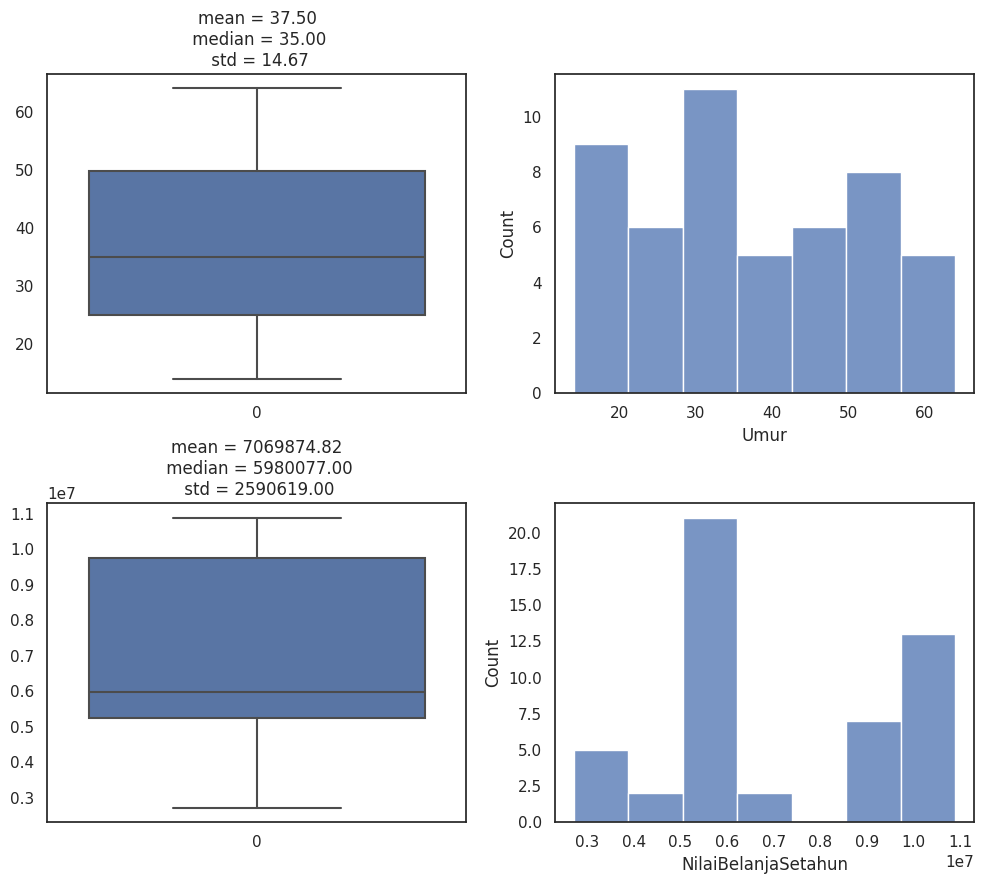

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
import pandas as pd
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
plt.clf()

# Fungsi untuk membuat plot
def observasi_num(features):
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.histplot(df[kol], ax = axs[i][1])
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()

# Memanggil fungsi untuk membuat Plot untuk data numerik
kolom_numerik = ['Umur','NilaiBelanjaSetahun']
observasi_num(kolom_numerik)

##Kesimpulan
Dari hasil eksplorasi data tersebut kamu dapat mendapatkan informasi:

Rata-rata dari umur pelanggan adalah 37.5 tahun
Rata-rata dari nilai belanja setahun pelanggan adalah 7,069,874.82
Jenis kelamin pelanggan di dominasi oleh wanita sebanyak 41 orang (82%) dan laki-laki sebanyak 9 orang (18%)
Profesi terbanyak adalah Wiraswasta (40%) diikuti dengan Professional (36%) dan lainnya sebanyak (24%)
Dari seluruh pelanggan 64% dari mereka tinggal di Cluster dan 36% nya tinggal di Sektor
Tips:

Kita dapat mengenal data kita lebih jauh lagi pada tahapan eksplorasi data ini. Proses eksplorasi data bisa berupa univariate maupun multivariate data eksplorasi. Eksplorasi Data Univariate melihat karakteristik tiap-tiap feature, misalnya dengan melihat statistik deskriptif, membuat histogram, kdeplot, countplot maupun boxplot. Sedangkan untuk Eksplorasi Data Multivariate, kita melihat hubungan tiap variabel dengan variabel lainnya, misal kan dengan membuat korelasi matrix, melihat predictive power, cross tabulasi, dan lainnya.

##Mempersiapkan Data Sebelum Permodelan
Setiap machine learning model memiliki karakteristik yang berbeda-beda. Hal ini membuat kamu harus mempersiapkan data yang kamu miliki sebelum digunakan untuk melakukan permodelan. Sehingga dapat menyesuaikan dengan karakteristik yang dimiliki oleh tiap model dan mendapatkan hasil yang optimal.

Kamu berencana akan melakukan permodelan dengan menggunakan teknik unsupervised clustering. Algoritma yang akan digunakan adalah K-Prototypes. Salah satu faktor utama dalam algoritma ini adalah kamu perlu menggunakan data yang skala antar variabelnya setara. Selain itu kita juga perlu melakukan encoding kolom - kolom kategorikal yang dimiliki menjadi numerik. Kemudian menggabungkan hasil pemrosesan data tersebut menjadi satu dataframe untuk digunakan dalam permodelan.

##Standarisasi Kolom Numerik
Supaya mendapatkan hasil yang maksimal dalam penerapan algoritma ini, kamu perlu menjadikan data-data numerik yang kamu miliki berada pada satu skala. Hal ini dapat dilakukan dengan melakukan standardisasi data yang kamu miliki. Tujuannya adalah agar variabel yang memiliki skala besar tidak mendominasi bagaimana cluster akan dibentuk dan juga tiap variabel akan dianggap sama pentingnya oleh algoritma yang akan digunakan.

Tugas:

Lakukan standardisasi kolom-kolom numerik dan tampilkan hasilnya. Selain itu tampilkan deskriptif statistik sebelum dan sesudah standardisasi untuk melihat perbedaannya.

Jika dilakukan dengan benar, makan kamu akan mendapatkan hasil sebagai berikut:



Kamu dapat melihat setelah dilakukan standardisasi nilai mean dan standard deviasi setiap variabel menjadi 0 dan 1. Hal ini menunjukan bahwa data kita sudah dalam skala yang sama.

In [24]:
import pandas as pd
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

from sklearn.preprocessing import StandardScaler

kolom_numerik  = ['Umur','NilaiBelanjaSetahun']

# Statistik sebelum Standardisasi
print('Statistik Sebelum Standardisasi\n')
print(df[kolom_numerik ].describe().round(1))

# Standardisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistic
print('Contoh hasil standardisasi\n')
print(df_std.head())

print('Statistik hasil standardisasi\n')
print(df_std.describe().round(0))


Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   -0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


##Konversi Kategorikal Data dengan Label Encoder
Selanjutnya kamu perlu merubah kolom-kolom yang berjenis kategorikal menjadi angka. Kita akan menggunakan salah satu fungsi dari sklearn yaitu LabelEncoder. Pada dasarnya fungsi ini akan melakukan konversi data pelanggan dari teks menjadi numerik.

Sebagai contoh untuk kolom Jenis Kelamin, teks "Pria" akan diubah menjadi angka 0 dan teks "Wanita" akan diuubah menjadi angka satu. Perubahan ini perlu kita untuk semua teks sebelum digunakan pada algoritma K-Prototype.

Tugas:

Ubahlah kolom-kolom kategorikal pada data set kamu menjadi numerik menggunakan LabelEncoder dari sklearn. Kemudian tampilkan hasil lima teratasnya.

Jika dilakukan dengan benar maka kamu akan mendapatkan hasil sebagai berikut:



Nilai pada tiap kolom merepresentasikan nilai seperti di bawah ini :

In [25]:
import pandas as pd
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

from sklearn.preprocessing import LabelEncoder

# Inisiasi nama kolom kategorikal
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

# Membuat salinan data frame
df_encode = df[kolom_kategorikal].copy()


# Melakukan labelEncoder untuk semua kolom kategorikal
for col in kolom_kategorikal:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print(df_encode.head())


   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


#Menggabungkan Data untuk Permodelan
Setelah menyelesaikan dua tahap sebelumnya, kali ini kamu akan menggabungkan kedua hasil pemrosesan tersebut menjadi satu data frame. Data frame ini yang akan digunakan untuk permodelan.

Tugas:

Gabungkan kedua data frame df_std dan df_encode yang sudah dibuat di tahap sebelumnya menjadi df_model.

Jika dilakukan dengan benar maka kamu akan mendapatkan hasil sebagai berikut:

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

kolom_numerik  = ['Umur','NilaiBelanjaSetahun']
df_std = StandardScaler().fit_transform(df[kolom_numerik])
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']
df_encode = df[kolom_kategorikal].copy()
for col in kolom_kategorikal:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menggabungkan data frame
df_model = df_encode.merge(df_std, left_index=True, right_index=True, how='left')
print(df_model.head())

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


##Kesimpulan
Sampai di sini, kamu sudah menggunakan kemampuan kamu dalam menyiapkan library dan data. Kemudian melakukan data eksplorasi dan pemrosesan data hingga mendapatkan data yang siap digunakan untuk permodelan.

Tips:

Pada aplikasi di industri, proses pemrosesan data ini termasuk yang paling banyak menghabiskan waktu bagi data scientist. Selain yang sudah kita lakukan masih banyak teknik lain yang perlu dilakukan. Sebagai contoh kadang kita perlu melakukan data imputation ketika ada null data di dataset yang akan kita gunakan. Selain itu kadang kita juga perlu melakukan transformasi variabel, misalnya ketika kita memiliki distribusi data yang condong ke salah satu sisi (skew data). Tambahan contoh lainnya yaitu terkadang kita perlu menangani pencilan yang ada di data kita.

##Penutup
Congratulation!

Kamu sudah berhasil menyelesaikan modul ini. Tapi, perjalan belajarmu tidak berhenti sampai di sini.

Masih banyak yang perlu kamu pelajari. Pada bagian selanjutnya kamu akan melakukan segmentasi pelanggan menggunakan K-Prototypes algoritma menggunakan df_model yang sudah kamu pelajari pada modul ini.

Jangan pernah bosan dan mudah menyerah mempelajari data science. Tetap berlatih dan asah kemampuan data science mu di DQLab.

Terbuka kesempatan besar untuk kamu menjadi talenta data di industri.